# Matplotlib e Pandas

O Pandas é uma biblioteca que permite a manipulação de dados de forma simples e eficiente. Ela é construída sobre o NumPy e permite a manipulação de dados de forma simples e eficiente. Quanto a gráficos, o Pandas utiliza o Matplotlib como base para a geração de gráficos.



## Base de dados utilizada

Para este notebook, utilizaremos a base de dados do top 10 IBOV de maio a agosto de 2023. A base de dados foi obtida no site do Yahoo Finance. O IBOV é o índice da Bovespa, que é a bolsa de valores brasileira. O IBOV é composto pelas ações mais negociadas na bolsa de valores brasileira. Para compor o IBOV, é feito um cálculo de ponderação das ações, onde as ações mais negociadas possuem maior peso no índice. O IBOV é um índice que é utilizado para medir o desempenho médio das cotações das ações mais negociadas na bolsa de valores brasileira.

Este material é didático e não tem como objetivo a recomendação de compra ou venda de ativos.

Sobre as ações seguem os nomes referentes a cada uma delas e seus respectivos setores:

Código | Nome | Setor
--- | --- | ---
 VALE3 | Vale | Mineração
 ELET3 | Eletrobras | Energia Elétrica
 BBAS3 | Banco do Brasil | Bancário
 B3SA3 | B3 | Financeiro
 ABEV3 | Ambev | Bebidas
 ITUB4 | Itaú Unibanco | Bancário
 BBDC4 | Bradesco | Bancário
 WEGE3 | Weg | Máquinas e Equipamentos
 PETR3 | Petrobras | Petróleo, Gás e Biocombustíveis
 RENT3 | Localiza | Locação de Veículos

In [6]:
import pandas as pd

ARQUIVO_TOP_10_IBOV = 'dados/top_10_ibov_mai_ago_2023.csv'

df_top_10_ibov = pd.read_csv(ARQUIVO_TOP_10_IBOV)
df_top_10_ibov.head()

,Date,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
0,2023-01-02,87.478874,40.327332,31.615412,12.039818,14.19,23.893169,13.879215,37.771538,22.264847,50.636215
1,2023-01-03,87.322311,39.572250,31.026070,11.636853,14.17,23.395597,13.190460,36.829731,21.950058,49.391312
2,2023-01-04,87.478874,40.635326,31.425303,11.725308,14.25,23.463890,13.228148,37.077576,22.315893,49.974247
3,2023-01-05,88.946640,40.714806,32.860638,12.088961,14.29,24.195612,13.802876,37.156883,23.039053,50.389210
4,2023-01-06,90.355698,40.734676,33.316906,12.373984,14.32,24.615131,14.189168,37.702141,22.894421,51.347595


In [7]:
df_top_10_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    123 non-null    object 
 1   VALE3   123 non-null    float64
 2   ELET3   123 non-null    float64
 3   BBAS3   123 non-null    float64
 4   B3SA3   123 non-null    float64
 5   ABEV3   123 non-null    float64
 6   ITUB4   123 non-null    float64
 7   BBDC4   123 non-null    float64
 8   WEGE3   123 non-null    float64
 9   PETR3   123 non-null    float64
 10  RENT3   123 non-null    float64
dtypes: float64(10), object(1)
memory usage: 10.7+ KB


In [8]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df_top_10_ibov['Date'] = pd.to_datetime(df_top_10_ibov['Date'], format='%Y-%m-%d')

In [9]:
df_top_10_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    123 non-null    datetime64[ns]
 1   VALE3   123 non-null    float64       
 2   ELET3   123 non-null    float64       
 3   BBAS3   123 non-null    float64       
 4   B3SA3   123 non-null    float64       
 5   ABEV3   123 non-null    float64       
 6   ITUB4   123 non-null    float64       
 7   BBDC4   123 non-null    float64       
 8   WEGE3   123 non-null    float64       
 9   PETR3   123 non-null    float64       
 10  RENT3   123 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 10.7 KB


In [10]:
df_top_10_ibov.head()

,Date,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
0,2023-01-02,87.478874,40.327332,31.615412,12.039818,14.19,23.893169,13.879215,37.771538,22.264847,50.636215
1,2023-01-03,87.322311,39.572250,31.026070,11.636853,14.17,23.395597,13.190460,36.829731,21.950058,49.391312
2,2023-01-04,87.478874,40.635326,31.425303,11.725308,14.25,23.463890,13.228148,37.077576,22.315893,49.974247
3,2023-01-05,88.946640,40.714806,32.860638,12.088961,14.29,24.195612,13.802876,37.156883,23.039053,50.389210
4,2023-01-06,90.355698,40.734676,33.316906,12.373984,14.32,24.615131,14.189168,37.702141,22.894421,51.347595


In [11]:
# criando um novo indice, utilizando a coluna Date, como novo índice e removendo ela do df
df_top_10_ibov = df_top_10_ibov.set_index('Date', drop=True)
df_top_10_ibov.head()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
Date,,,,,,,,,,
2023-01-02,87.478874,40.327332,31.615412,12.039818,14.19,23.893169,13.879215,37.771538,22.264847,50.636215
2023-01-03,87.322311,39.572250,31.026070,11.636853,14.17,23.395597,13.190460,36.829731,21.950058,49.391312
2023-01-04,87.478874,40.635326,31.425303,11.725308,14.25,23.463890,13.228148,37.077576,22.315893,49.974247
2023-01-05,88.946640,40.714806,32.860638,12.088961,14.29,24.195612,13.802876,37.156883,23.039053,50.389210
2023-01-06,90.355698,40.734676,33.316906,12.373984,14.32,24.615131,14.189168,37.702141,22.894421,51.347595


In [12]:
df_top_10_ibov.describe()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,78.611862,36.116596,40.483970,12.228990,14.181789,25.451306,14.236140,38.677956,26.009727,57.682620
std,9.373119,3.229293,4.710353,1.302324,0.674569,1.527655,1.310557,1.249857,3.457692,5.167213
min,63.810001,30.332432,31.026070,10.246643,12.860000,22.617268,12.355516,36.342026,21.754379,49.391312
25%,69.049999,33.535763,37.366261,11.215220,13.615000,24.360209,13.209580,37.657532,23.630344,53.502365
50%,80.290001,35.320000,39.086395,11.921384,14.290000,25.315250,13.731629,38.698261,25.157490,56.580109
75%,86.666714,39.080000,42.888365,13.086743,14.610000,26.384904,15.382814,39.606815,27.468965,61.624264
max,95.894073,42.473354,51.990002,15.095129,15.550000,29.021967,17.064342,41.793327,35.680000,67.951851


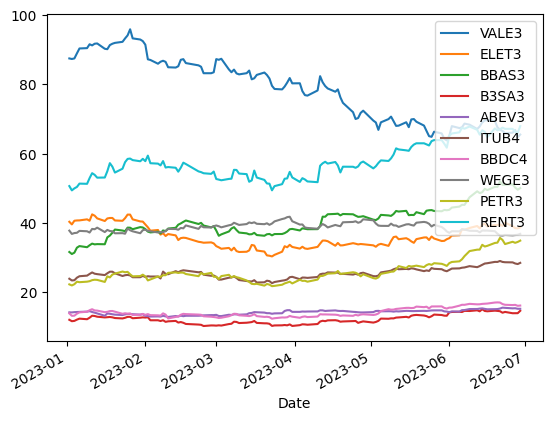

In [13]:
df_top_10_ibov.plot();

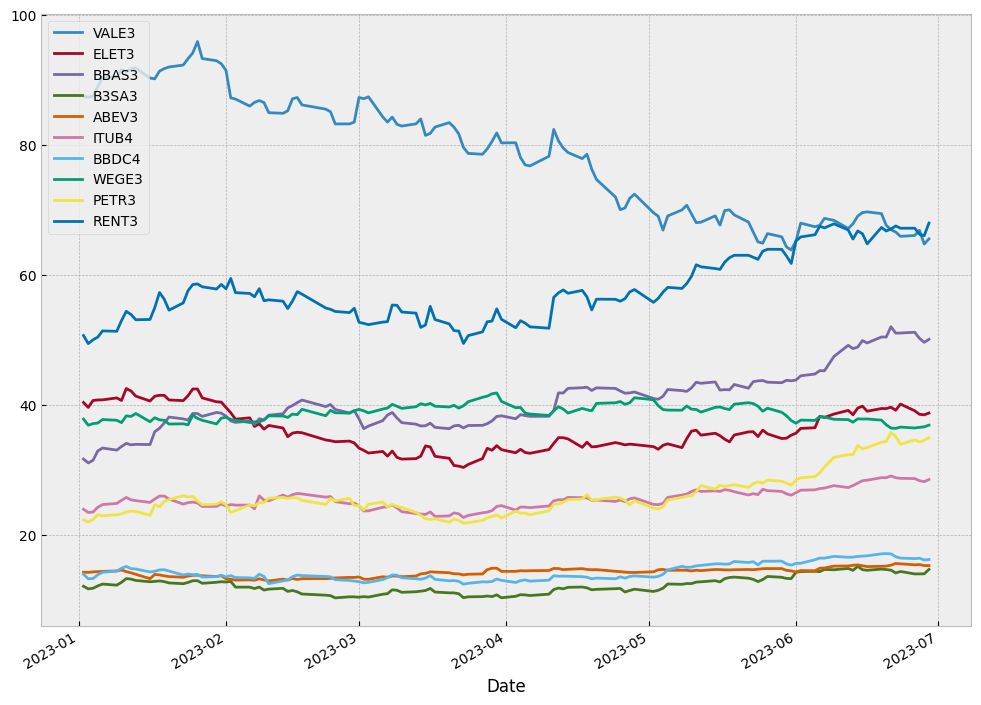

In [14]:
import matplotlib.pyplot as plt

plt.style.use('bmh')

df_top_10_ibov.plot(figsize=(12, 9))

plt.show()

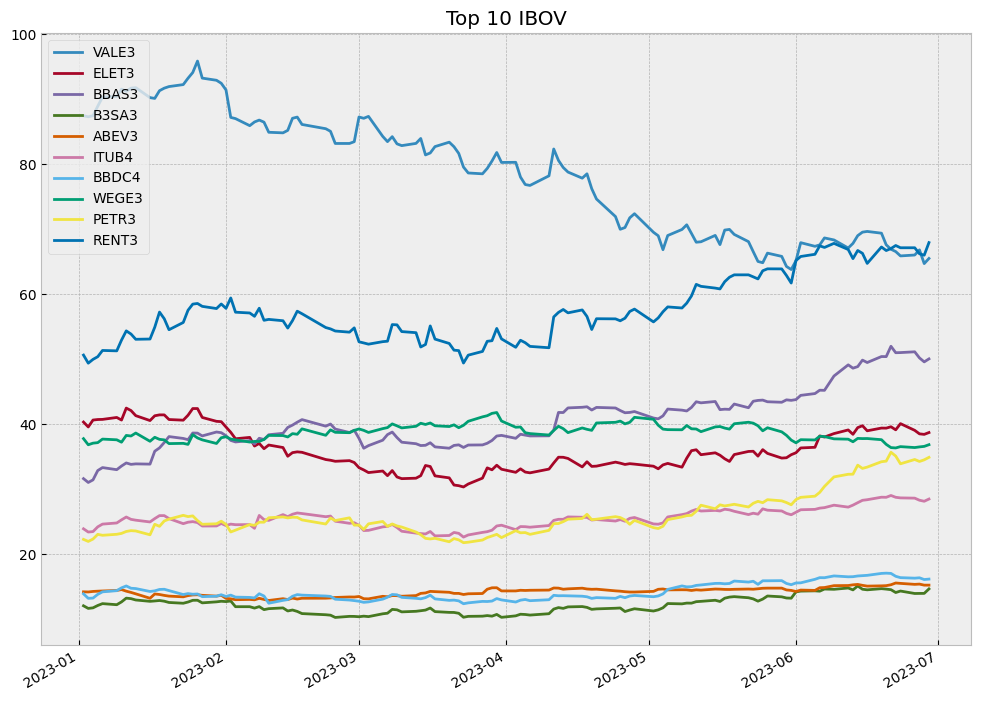

In [15]:
fig, new_axle = plt.subplots(figsize=(12, 9))

df_top_10_ibov.plot(ax=new_axle, xlabel=(''), title='Top 10 IBOV')

# via matplotlib
# new_axle.set_xlabel('')
# new_axle.set_title('Top 10 IBOV')

plt.show()

/var/folders/47/2x6q6rqx6p7fklp63jjs1g_w0000gn/T/ipykernel_26212/1988848304.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_top_10_ibov.plot(ax=new_axle, xlabel=(''), title='Top 10 IBOV', subplots=True)


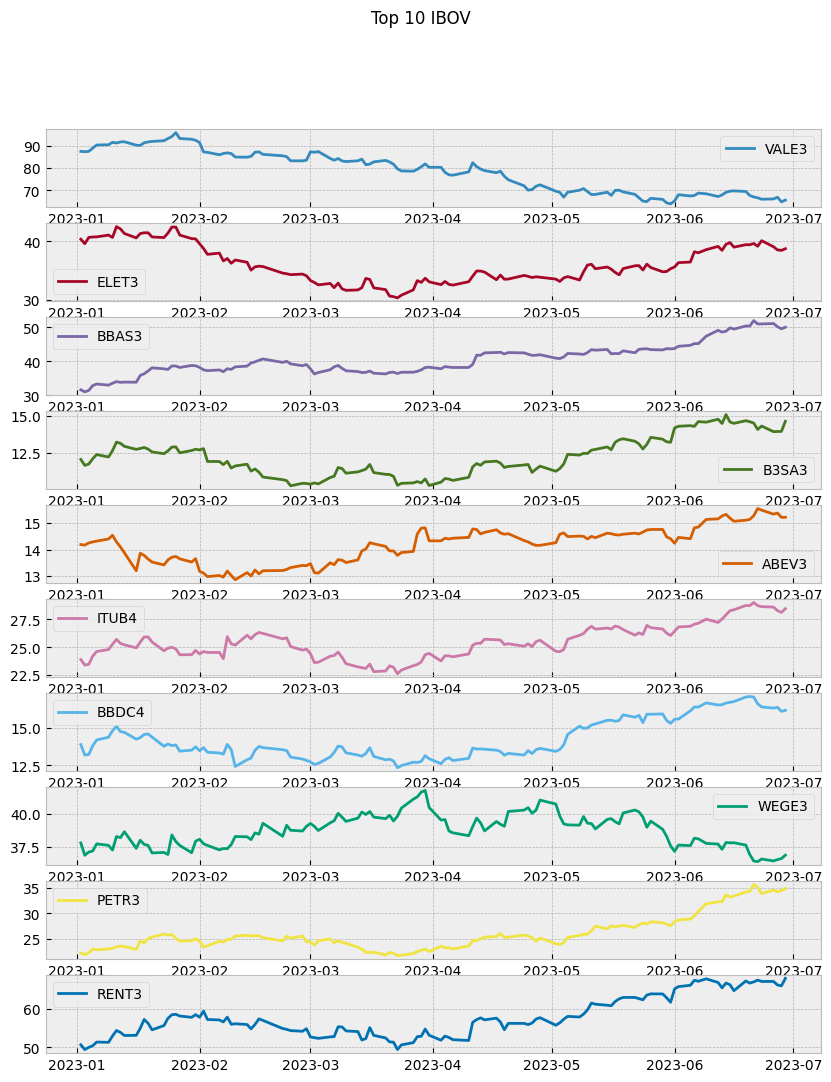

In [16]:
fig, new_axle = plt.subplots(figsize=(10, 12))

df_top_10_ibov.plot(ax=new_axle, xlabel=(''), title='Top 10 IBOV', subplots=True)

plt.show()

/var/folders/47/2x6q6rqx6p7fklp63jjs1g_w0000gn/T/ipykernel_26212/1140870995.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_top_10_ibov.plot(ax=new_axle, xlabel=(''), title='Top 10 IBOV', subplots=True, layout=(5, 2))


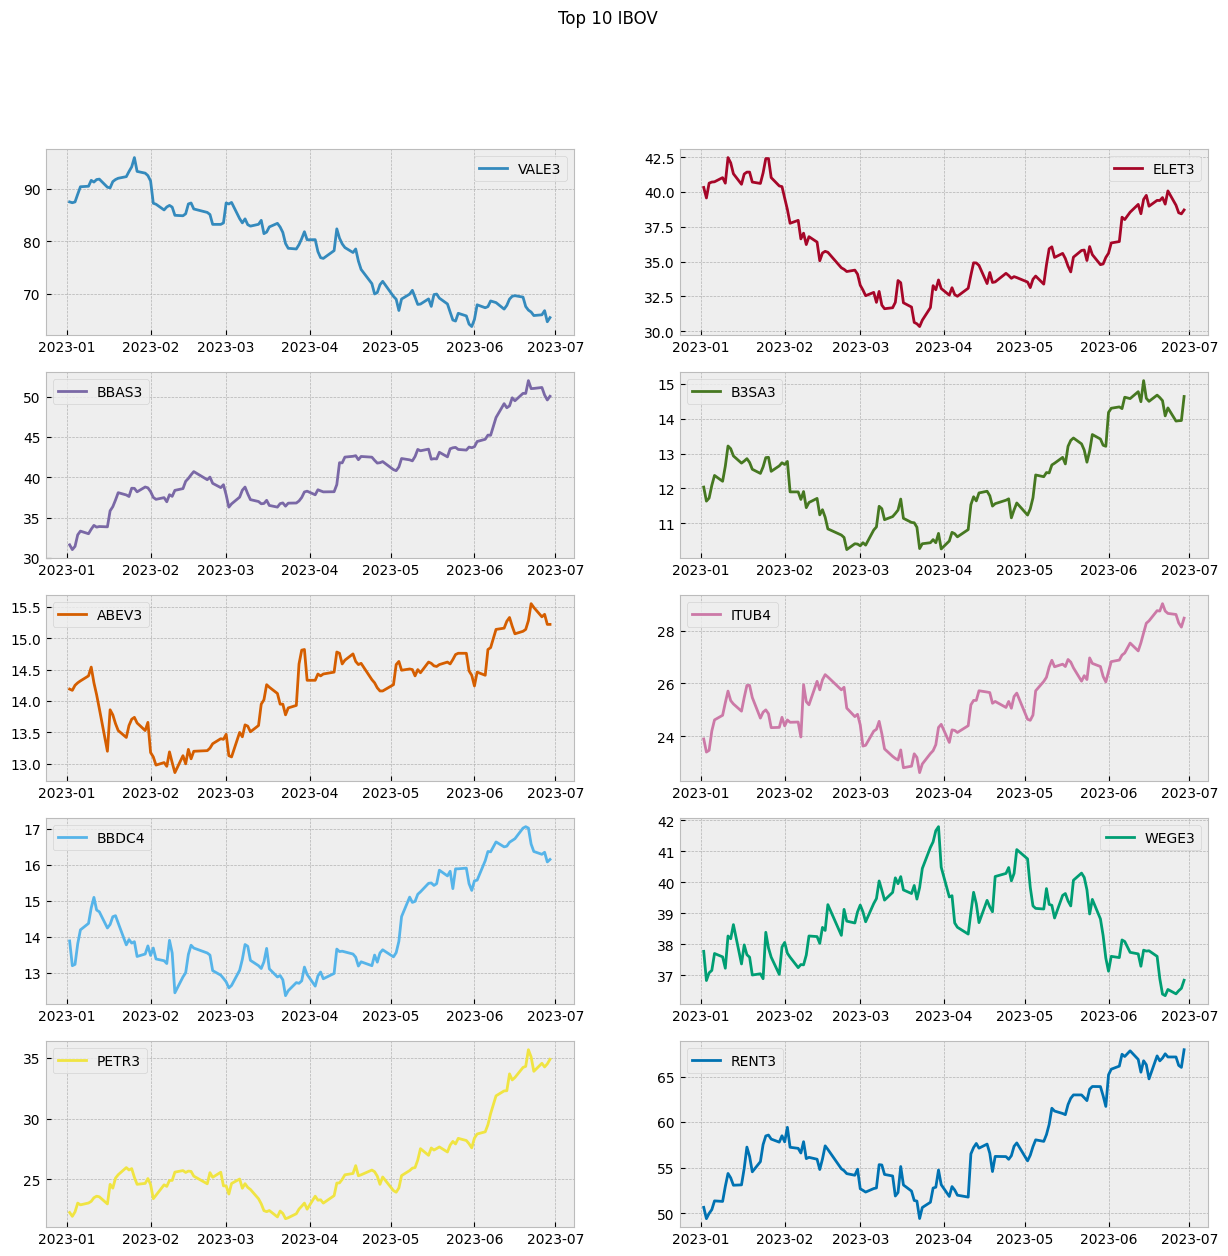

In [17]:
fig, new_axle = plt.subplots(figsize=(15, 14))

df_top_10_ibov.plot(ax=new_axle, xlabel=(''), title='Top 10 IBOV', subplots=True, layout=(5, 2))

plt.show()